In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
data = np.loadtxt('/Users/laynep/work/reionization/importance_sampler/python_implementation/'+'lcdm_tau_lensing.txt')

#histbins = plt.hist(data,bins=35,range=[0.0675,0.0901],normed=True)
histbins = plt.hist(data,bins=35,range=[0.06,0.095],normed=True)


for x in zip(histbins[0],histbins[1]):
    print x[0],x[1]

In [ ]:
#Best-fit Schecter parameters from 1506.01035

z_list = np.linspace(0,15,25)
M_list = -20.97 + 0.17*(z_list-6.0)
phi_list = 0.45*10.0**(-0.21*(z_list-6.0))*1e-3
alpha_list = -1.91 - 0.13*(z_list-6.0)

for out in zip(z_list,phi_list,M_list,alpha_list):
    print out[:]

In [58]:
#Planck chains
data1 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_1.txt')
data2 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_2.txt')
data3 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_3.txt')
data4 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_4.txt')

data = np.concatenate((data1,data2,data3,data4),axis=0)

In [42]:
#Planck chains
data1 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_1.txt')
data2 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_2.txt')
data3 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_3.txt')
data4 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_4.txt')

datax = np.concatenate((data1,data2,data3,data4),axis=0)

In [56]:
#Planck chains
data1 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_1.txt')
data2 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_2.txt')
data3 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_3.txt')
data4 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_4.txt')

datay = np.concatenate((data1,data2,data3,data4),axis=0)

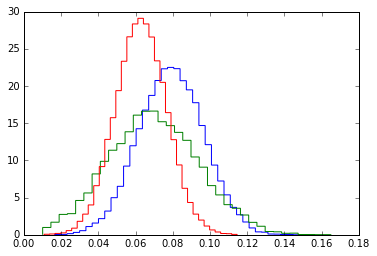

In [57]:
x1,x2,x3 = plt.hist(data[:,5],bins=40,normed=True,histtype='step')
x1,x2,x3 = plt.hist(datax[:,5],bins=35,normed=True,histtype='step')
x1,x2,x3 = plt.hist(datay[:,5],bins=35,normed=True,histtype='step')



In [84]:
test = map(lambda x: np.mean(datax[:,x]), xrange(len(datax[0])))
ombh2 = test[2]
ommh2 = test[3]
logA = test[6]
ns = test[7]
H0 = test[23]
#H0 = test[35]
sig8 = test[29]
#sig8 = test[41]


print ombh2, ommh2, logA, ns, H0, sig8

0.0222814855054 0.118221458591 3.06928983613 0.968595931916 67.9736781881 0.816765406081


In [106]:
10.0**-5.221

6.011737374832779e-06